In [2]:
from sklearn.datasets import make_classification

In [139]:
from matplotlib import pyplot as plt 
import numpy as np

In [286]:
X,Y = make_classification(n_classes=2,
                          n_samples=400,
                          n_clusters_per_class=1,
                          random_state=11,
                          n_features=2,
                          n_informative=2,
                         n_redundant=0)

In [287]:
X[5]

array([1.11474911, 1.19515992])

In [288]:
Y[Y==0]=-1

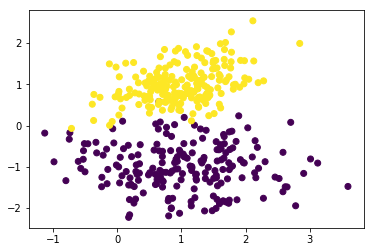

In [289]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [290]:
class SVM:
    def __init__(self,C=1):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeloss(self,W,b,X,Y):
        loss = 0.0
        
        loss+= 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,1-ti)
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate = 0.001,maxItr = 200):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #init the model parameter
        W = np.zeros((1,no_of_features))
        bias = 5
        
        #Inital Loss
        #print(self.hingeloss(w,bias,X,Y))
        
        #Training from here...
        #Weight and Bias update rule 
        losses = []
        for i in range(maxItr):
            #Training loop
            
            l = self.hingeloss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #batch gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                gradw = 0
                gradb = 0
                
                #iterate over all examples in the batch 
                for j in range(batch_start,batch_start+batch_size):
                    if(j<no_of_samples):
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if (ti>1):
                            gradb += 0
                            gradw += 0

                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]

                #gradient for the batch is ready!update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
               
        self.W = W
        self.b = bias
        return W,bias,losses
                

In [299]:
mySVM = SVM(C=1)

In [300]:
w,b,loss = mySVM.fit(X,Y,maxItr=120)

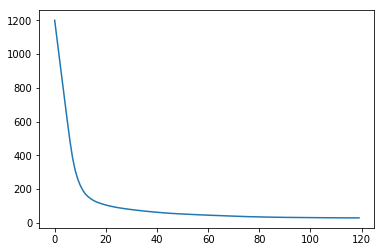

In [301]:
plt.plot(loss)

In [302]:
print(w,b)

[[-0.58876937  2.72102813]] 0.36500000000000965


In [303]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-1,3,15)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = 1
    
    plt.plot(x_1,x_2,label = "Hyperplane WX + B = 0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
 

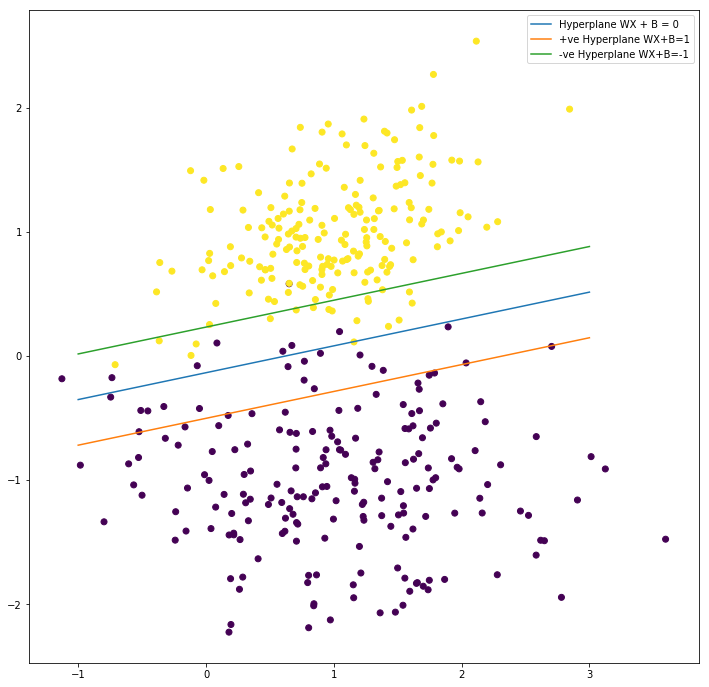

In [304]:
plotHyperplane(w[0,0],w[0,1],b)